In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

### Задание 1

In [3]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)

In [4]:
y = pd.DataFrame(target, columns=['price'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

In [7]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
X = pd.DataFrame(data, columns=feature_names)
y = target

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


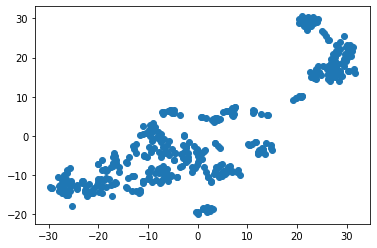

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

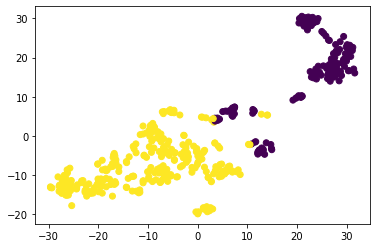

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [13]:
labels_test = kmeans.predict(X_test_scaled)

In [14]:
y_train.mean()

price    22.796535
dtype: float64

In [15]:
y_train[labels_train == 0].mean()

price    16.493478
dtype: float64

In [16]:
y_train[labels_train == 1].mean()

price    26.066541
dtype: float64

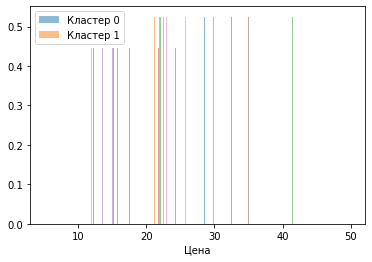

In [17]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

In [18]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'RM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'RM'].mean()))

Кластер 0: 5.973260869565214
Кластер 1: 6.493646616541352


In [19]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))

Кластер 0: 10.03253507246377
Кластер 1: 0.2766786090225563


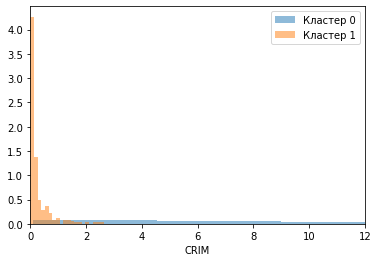

In [20]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')

plt.show()

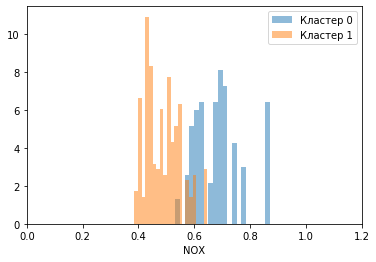

In [21]:
plt.hist(X_train.loc[labels_train == 0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'NOX'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX')

plt.show()

### Задание 2

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [23]:
trains_labels = kmeans.fit_predict(X_train_scaled)
trains_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [24]:
pd.value_counts(trains_labels)

2    191
1    127
0     86
dtype: int64

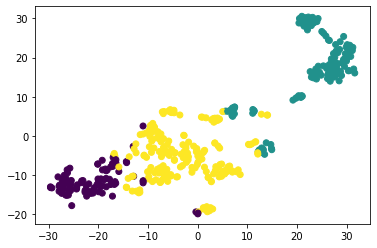

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=trains_labels)
plt.show()

In [29]:
print('Кластер 0: {}'.format(X_train.loc[trains_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[trains_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[trains_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [38]:
print('Кластер 0: {}'.format(y_train.loc[trains_labels == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[trains_labels == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[trains_labels == 2, 'price'].mean()))

Кластер 0: 27.788372093023252
Кластер 1: 16.165354330708666
Кластер 2: 24.958115183246072


### Задание 3

In [39]:
tests_labels = kmeans.fit_predict(X_test_scaled)
tests_labels

array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [41]:
pd.value_counts(tests_labels)

1    53
2    35
0    14
dtype: int64

In [43]:
tsne_t = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


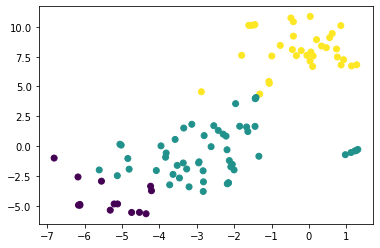

In [44]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=tests_labels)
plt.show()

In [46]:
print('Кластер 0: {}'.format(X_test.loc[tests_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[tests_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[tests_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143


In [47]:
print('Кластер 0: {}'.format(y_test.loc[tests_labels == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[tests_labels == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[tests_labels == 2, 'price'].mean()))

Кластер 0: 33.871428571428574
Кластер 1: 21.552830188679245
Кластер 2: 16.437142857142856
